# Linear Regression on Manchester United Players' Stats

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## 2018-2019 Stats

In [2]:
manutd_df = pd.read_csv('manutd_1819_stats.csv', index_col='Unnamed: 0')

## Visualizing Data

In [3]:
manutd_df.corr()

,Age,Starts,Gls,Ast,CrdY,Shot,TotPassCmpPerc
Age,1.000000,0.329164,-0.051201,0.022079,0.320678,-0.061884,0.248316
Starts,0.329164,1.000000,0.460365,0.486583,0.560817,0.489422,0.133198
Gls,-0.051201,0.460365,1.000000,0.628775,0.276930,0.931345,-0.045027
Ast,0.022079,0.486583,0.628775,1.000000,0.505337,0.808745,0.063540
CrdY,0.320678,0.560817,0.276930,0.505337,1.000000,0.350652,0.091163
Shot,-0.061884,0.489422,0.931345,0.808745,0.350652,1.000000,0.009649
TotPassCmpPerc,0.248316,0.133198,-0.045027,0.063540,0.091163,0.009649,1.000000


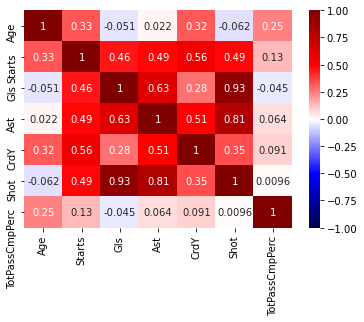

In [4]:
sns.heatmap(manutd_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1);

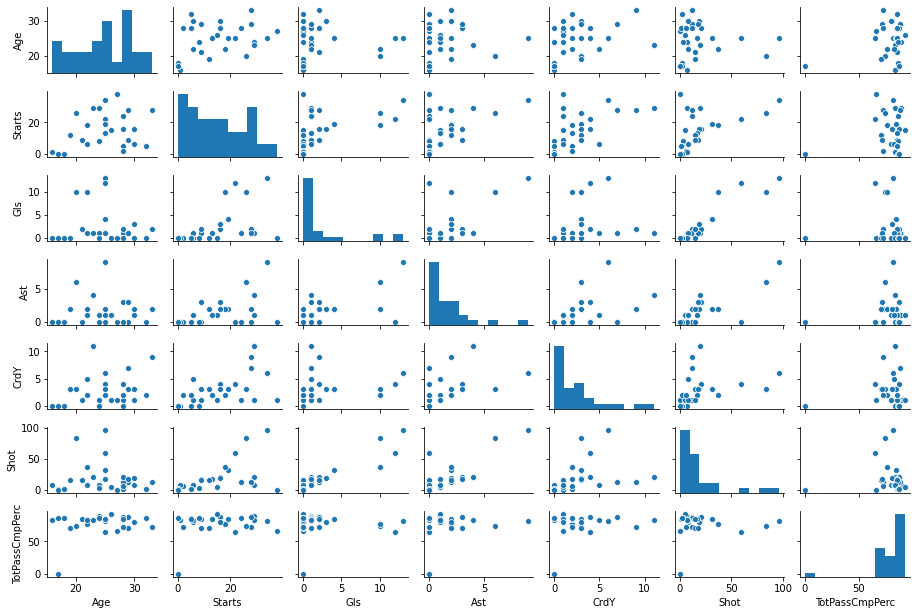

In [5]:
sns.pairplot(manutd_df, height=1.2, aspect=1.5);

In [6]:
# OLS with statsmodels
y, X = patsy.dmatrices('Gls ~ Age + Starts + Ast + CrdY + Shot + TotPassCmpPerc', data=manutd_df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gls   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     38.41
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           2.93e-10
Time:                        23:12:30   Log-Likelihood:                -42.415
No. Observations:                  28   AIC:                             98.83
Df Residuals:                      21   BIC:                             108.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3043      1.625     -0.187      0.853      -3.684       3.076
Age                0.0214      0.060      0.355      0.726      -0.104       0.146
Starts             0.0131      0.030      0.443      0.662      -0.048       0.075
Ast               -0.6995      0.217     -3.221      0.004      -1.151      -0.248
CrdY               0.0231      0.117      0.198      0.845      -0.220       0.267
Shot               0.1977      0.019     10.677      0.000       0.159       0.236
TotPassCmpPerc    -0.0104      0.015     -0.699      0.492      -0.042       0.021
==============================================================================
Omnibus:                       29.080   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.144
Skew:                           1.979   Prob(JB):                     2.92e-17
Kurtosis:                      10.043   Cond. No.                         590.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
manutd_df

,Age,Starts,Gls,Ast,CrdY,Shot,TotPassCmpPerc
David de Gea,27.0,38.0,0.0,0.0,1.0,0.0,65.5
Paul Pogba,25.0,34.0,13.0,9.0,6.0,96.0,81.7
Victor Lindelöf,24.0,29.0,1.0,1.0,1.0,7.0,89.3
Luke Shaw,23.0,29.0,1.0,4.0,11.0,20.0,83.5
Ashley Young,33.0,28.0,2.0,2.0,9.0,12.0,72.5
Nemanja Matić,29.0,28.0,1.0,0.0,7.0,12.0,87.9
Marcus Rashford,20.0,26.0,10.0,6.0,3.0,83.0,73.9
Chris Smalling,28.0,24.0,1.0,0.0,1.0,12.0,86.6
Romelu Lukaku,25.0,22.0,12.0,0.0,4.0,59.0,65.0
Jesse Lingard,25.0,19.0,4.0,2.0,3.0,31.0,84.8
